# Forzado armónico de un sistema de un único grado de libertad
 
© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   

![](ambos.png "UNLaM | DIIT")  

---

## Amortiguación proporcional a la velocidad
![](shabana_fig_1_11.png)

Se aplica una $\vec{F}(t)$ a un sistema caracterizado por

- m : masa
- c : coeficiente de de una fuerza de amortiguación lineal con la velocidad
- k : coeficiente de rigidez (stiffness) de un resorte que proveé una fuerza de Hooke

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True)
x, F = mech.dynamicsymbols('x F')

Para una amortiguación proporcional con la velocidad la dinámica la describe

In [3]:
x_EL_homogenea = m* x.diff(t,2) + c* x.diff(t) + k* x
x_EL_forzado = sym.Eq(x_EL_homogenea, F)
x_EL_forzado

que en ingeniería suele escibirse como

In [4]:
omega, zeta = sym.symbols('omega zeta', real = True)
x_EL_ing = sym.Eq(x_EL_forzado.lhs/m, x_EL_forzado.rhs/m).expand()
x_EL_ing = x_EL_ing.subs([(k/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
x_EL_ing.expand()

## forzado armónico
Vimos que cuando $F=0$ el movimiento se extingue más o menos rápido en función del $c$ de amortiguación, pero finalmente lo hace.
La solución de la ecuación homogénea produce entonces una **solución transitoria**.
En la presencia de $F(t)$ esta determina la **solución de estado estable** que es la que finalmente domina la dinámica. 

Se estudiará primero la respuesta el sistema con una fuerza armónica

In [5]:
F_0, omega_f = sym.symbols('F_0 omega_f', positive = True)
F_armonica = F_0* sym.sin(omega_f* t)
sym.Eq(F, F_armonica)

La ecuación diferencial a resolver es 

In [6]:
x_EL_ing_forzadoArmonico = x_EL_ing.expand().subs(F, F_armonica)
x_EL_ing_forzadoArmonico

Sabemos que substituyendo la solución particular que responde a tal forzado $x_p = A_1 \cos{\omega_f t} + A_2 \sin{\omega_f t}$ en la ecuación permite obtener los $A_i$.
Pero `sympy` puede encargarse de todo el proceso y darnos $x = x_h + x_p$ directamente. 

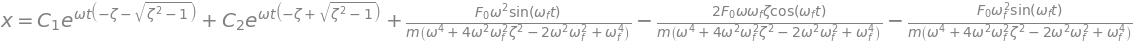

In [7]:
x_forzadoArmonico_sol = sym.dsolve(x_EL_ing_forzadoArmonico)
x_forzadoArmonico_sol

Los términos que dependen de $C_i$ son los de la solución homogénea que se considera se presenta durante un **transitorio** que se extiende extinto para $t> 10 \tau$ (10 **períodos de relajación**).
Para tiempos posteriores la solución alcanza el **estado estacionario** dado por los términos que dependen del forzado.

Se establece $C_1 = C_2 = 0$ para obtener solo $x_p(t)$.

In [8]:
simbolos = list( x_forzadoArmonico_sol.free_symbols )
C_1 = simbolos[5] 
C_2 = simbolos[0]
simbolos, C_1, C_2 # ¡OJO! VERIFICAR QUE SE OBTUVIERON LOS SÍMBOLOS DE C1 Y C2.

In [9]:
x_forzadoArmonico = x_forzadoArmonico_sol.subs([(C_1, 0), (C_2, 0)])
x_forzadoArmonico.simplify()

## Respuesta al forzado en el régimen sub-amortiguado

Utilizando los mismos parámetros para el caso sin forzado en el mismo régimen sub-amortiguado, $\zeta = 0.2$.

In [10]:
k_magnitud = 100 # [N m-1]
m_magnitud = 1 # [kg]
zeta_magnitud = 0.2 # [s-1]

parametros ={
    zeta : zeta_magnitud,
    omega : sym.sqrt(k_magnitud/m_magnitud),
    m : m_magnitud
}
x_forzadoArmonico_parametros = x_forzadoArmonico.subs(parametros).simplify()
x_forzadoArmonico_parametros

Pasa a ser de interés como varía la amplitud de la oscilación de $x$ en función de los parámetros del forzado.

Evidentemente es lineal con la amplitud del mismo. 
Es con su frecuencia $\omega_f$ donde se presentan distintos comportamientos.

In [11]:
F_0_magnitud = 100 # [N]
x_forzadoArmonico_omega_f = x_forzadoArmonico_parametros.subs(F_0, F_0_magnitud)

Para analizar la amplitud basta agrupar los términos con $\sin{(\omega_f t)}$ y los de $\cos{(\omega_f t)}$ y operar de igual manera de cuando se pasan números complejos de la forma rectangular a la polar.
Pues $a^2 \cos^2{\omega_f t} + b^2 \sin^2{\omega_f t} = a^2 + b^2 = R^2$, siendo $R$ el equivalente al módulo del número complejo. 

In [12]:
rectangular = sym.collect(x_forzadoArmonico_omega_f.rhs.expand(trig=True), [sym.sin(omega_f* t), sym.cos(omega_f* t)], evaluate=False)
rectangular

In [13]:
porSeno = rectangular[sym.sin(omega_f* t)]
porCoseno = rectangular[sym.cos(omega_f* t)]
# fase = sym.atan(porSeno / porCoseno).simplify()
modulo = sym.sqrt(porSeno**2 + porCoseno**2).simplify()
modulo

KeyError: sin(omega_f*t)

In [ ]:
sym.plot(modulo, (omega_f,0, 50), ylabel='|x| [m]', xlabel=r'$\omega_f$ [rad/s]') 

¿Y a que $\omega$ corresponde ese pico? Pues a no otra que

In [ ]:
sym.Eq(omega, sym.sqrt(k_magnitud/m_magnitud))

Cuando un sistema es excitado con una oscilación armónica de la frecuencia en que el sistema aislado oscilaría, la transferencia de energía es máxima y por tanto se alcanza la máxima amplitud de oscilación.
Esto se llama **resonancia** y es algo que debe evitarse si se busca una relativa estabilidad del sistema.